<a href="https://colab.research.google.com/github/Thotli-Sai-Hitesh-Reddy/Upload1/blob/main/EDA_DA_1_21BDS0264.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Dimensions: (299, 13)
Dataset Columns: Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

First Few Rows:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130  1.0   
1                    0  263358.03               1.1           136  1.0   
2                  

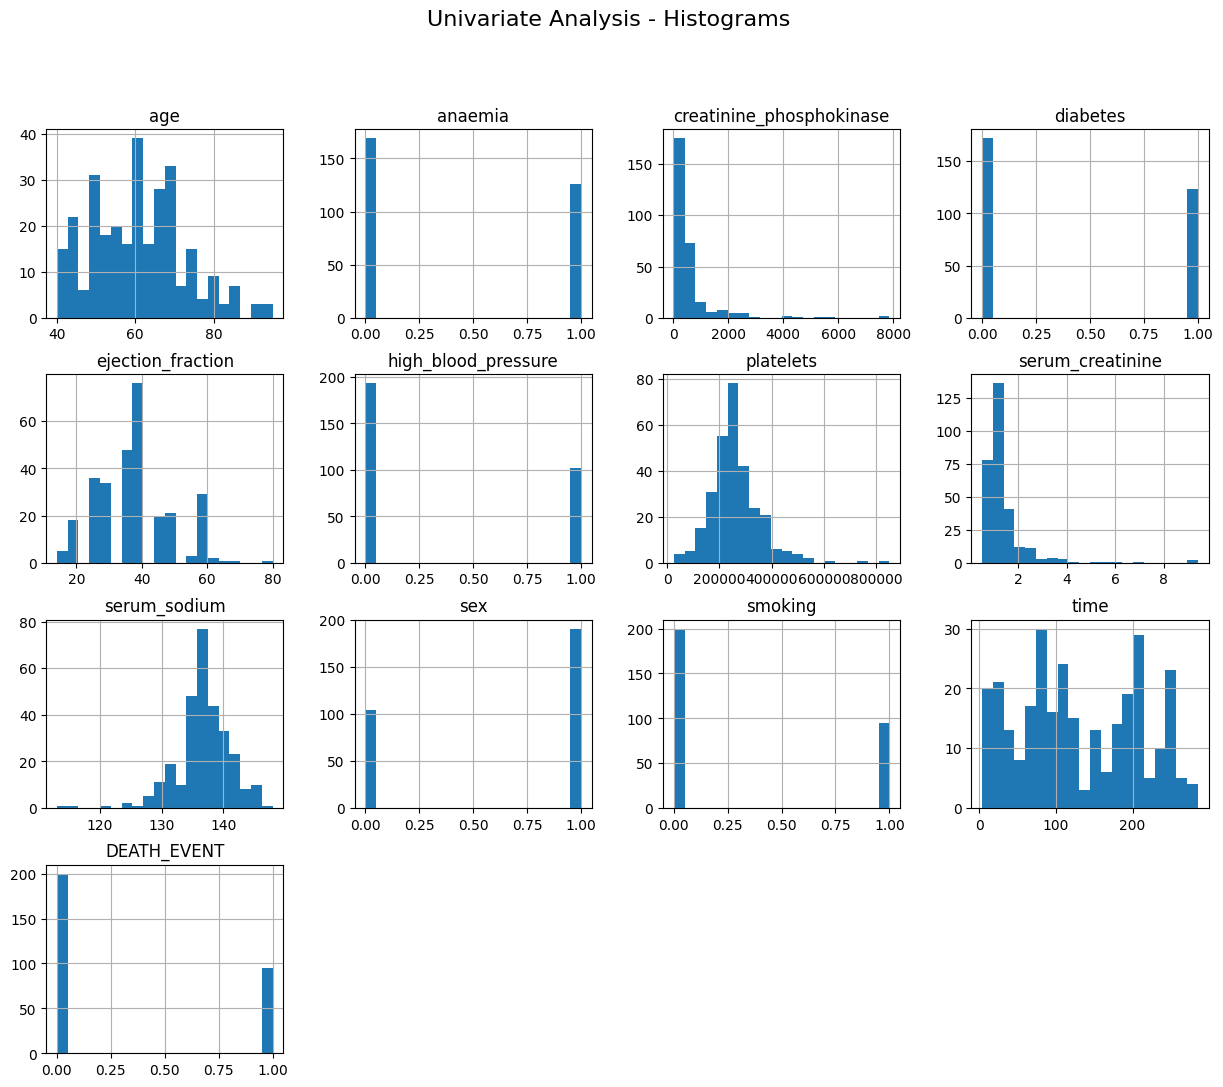

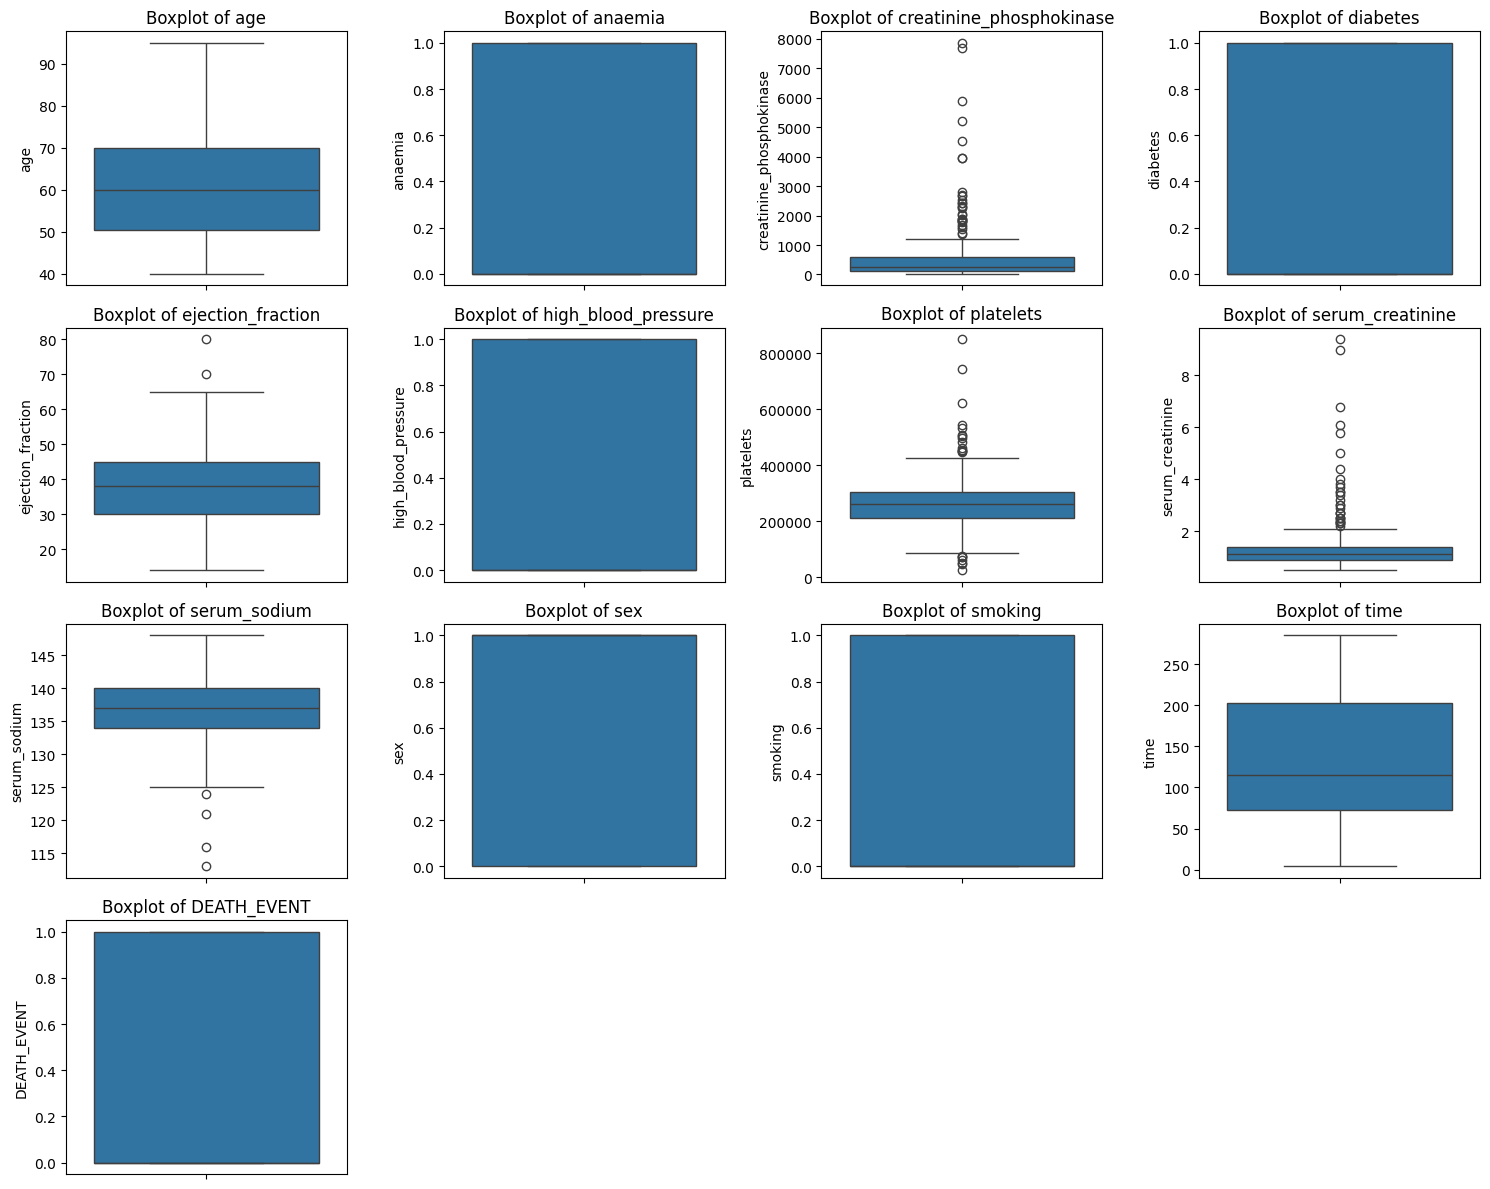

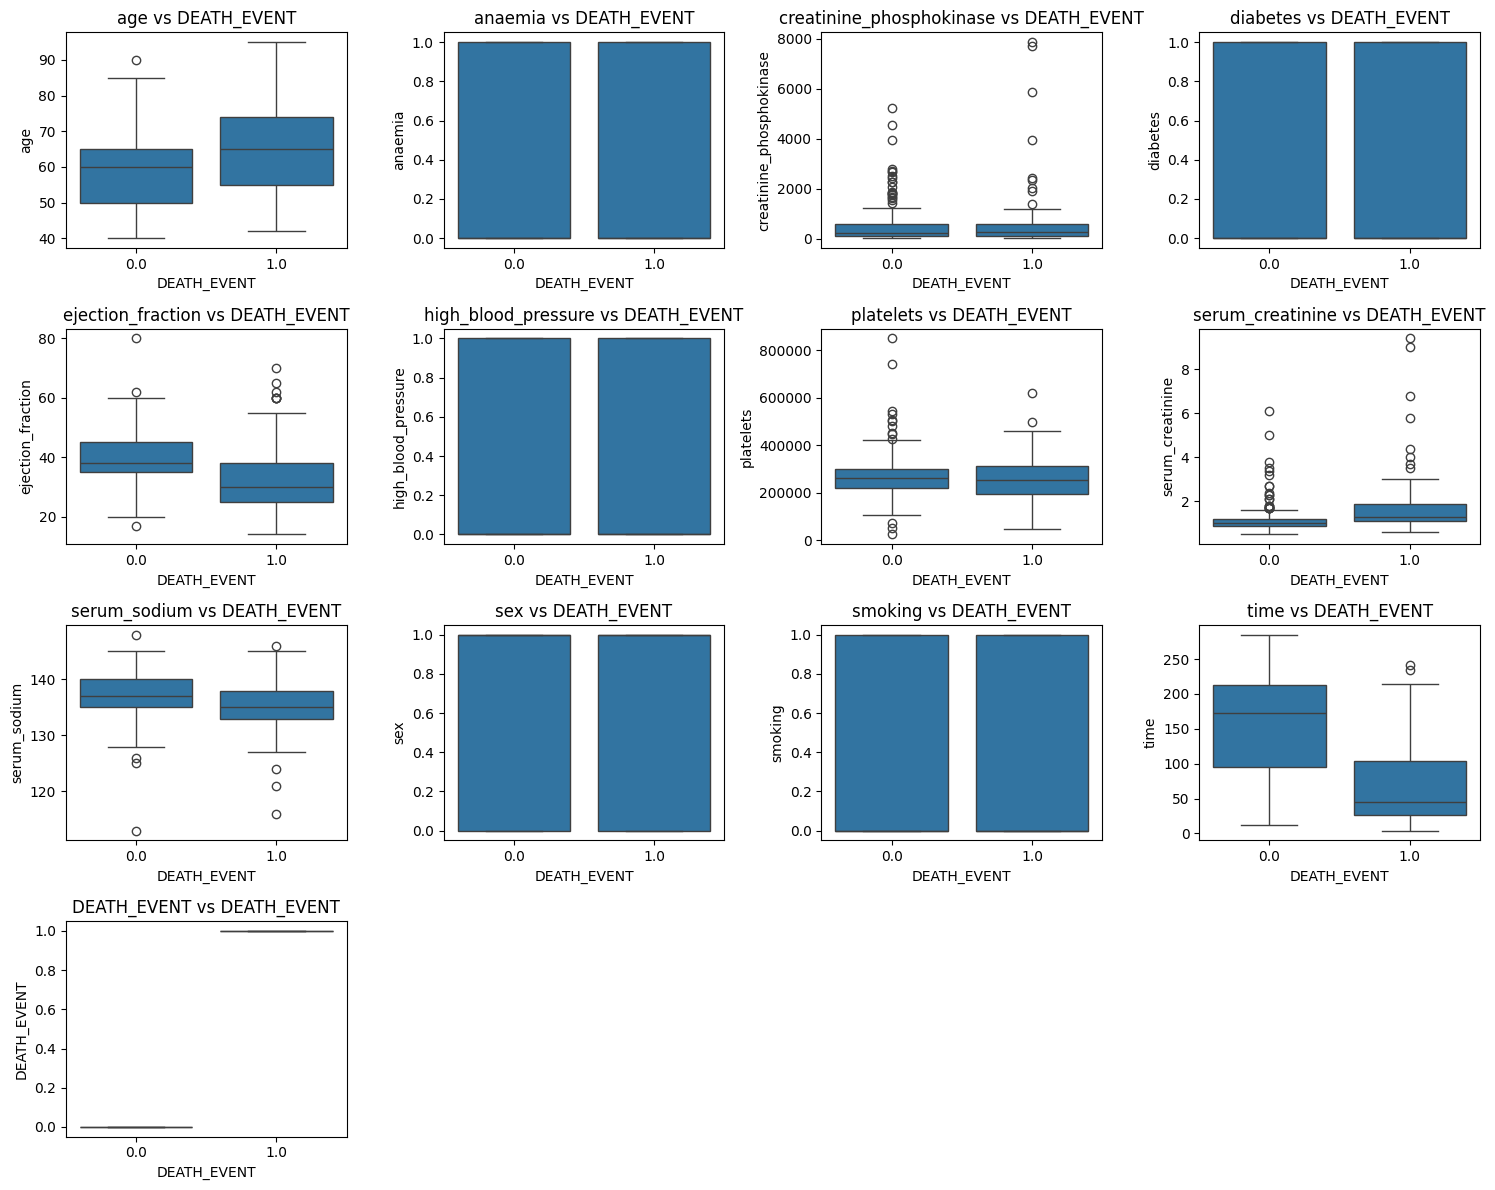

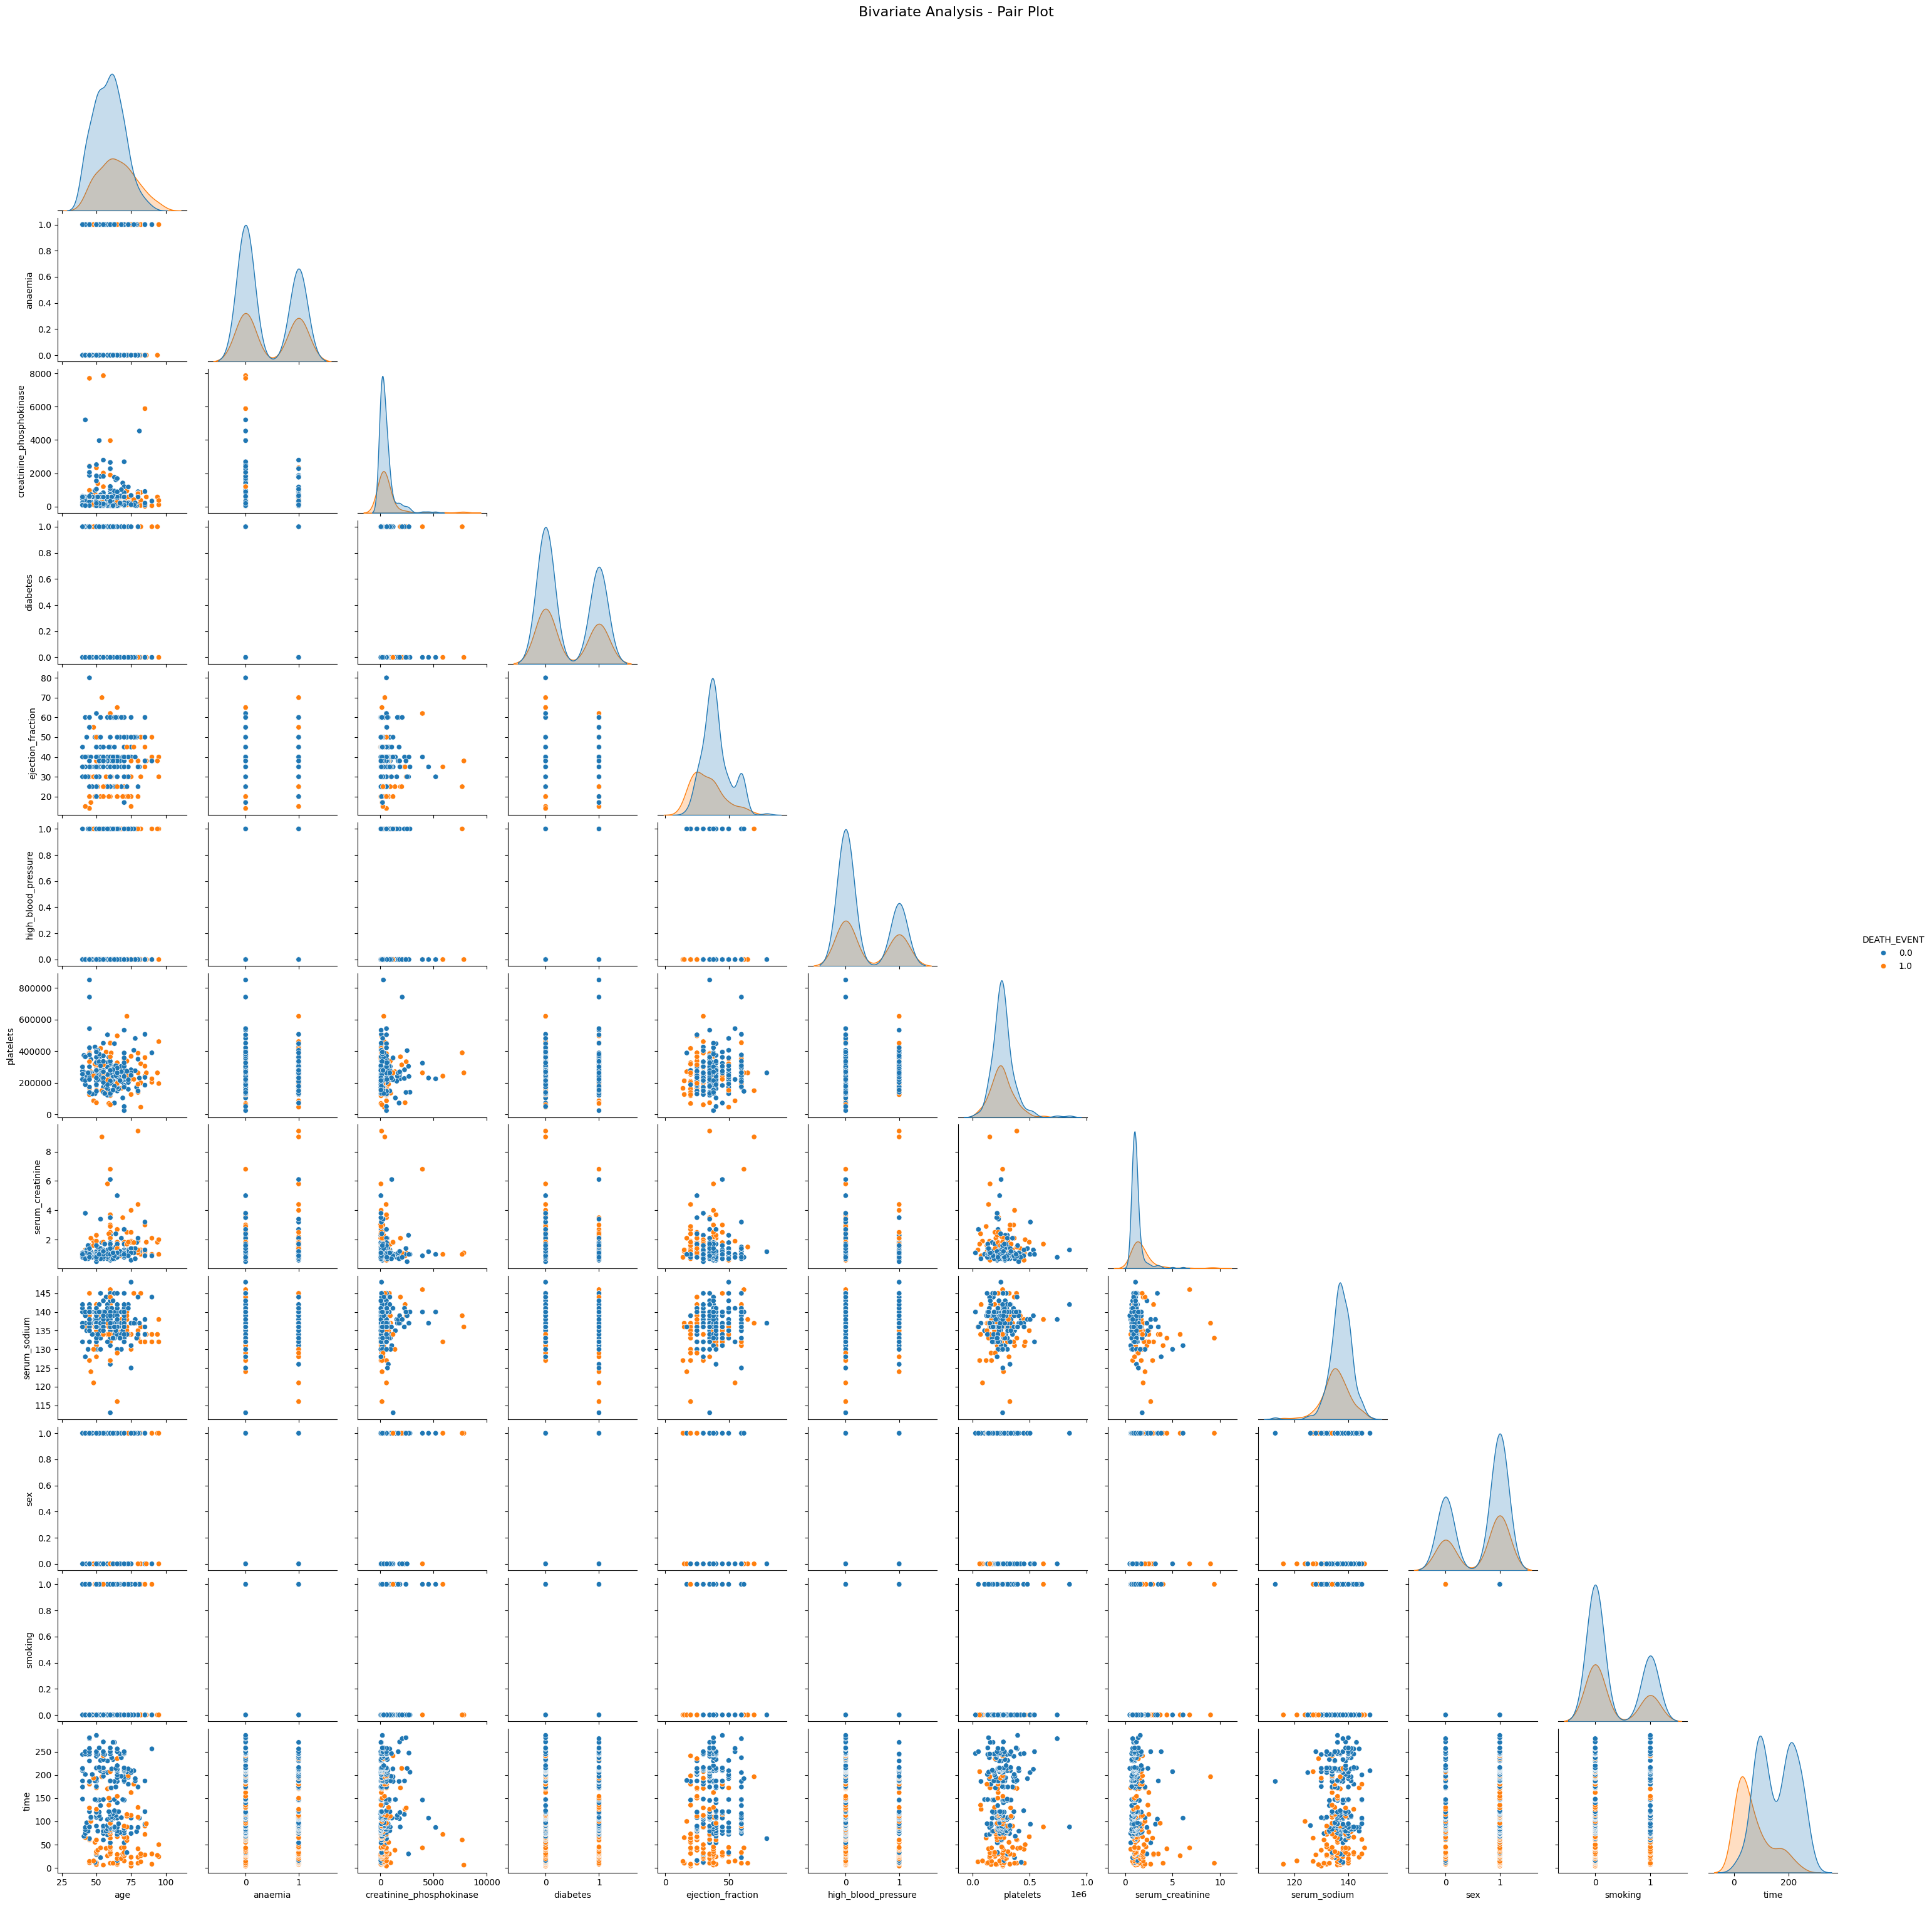

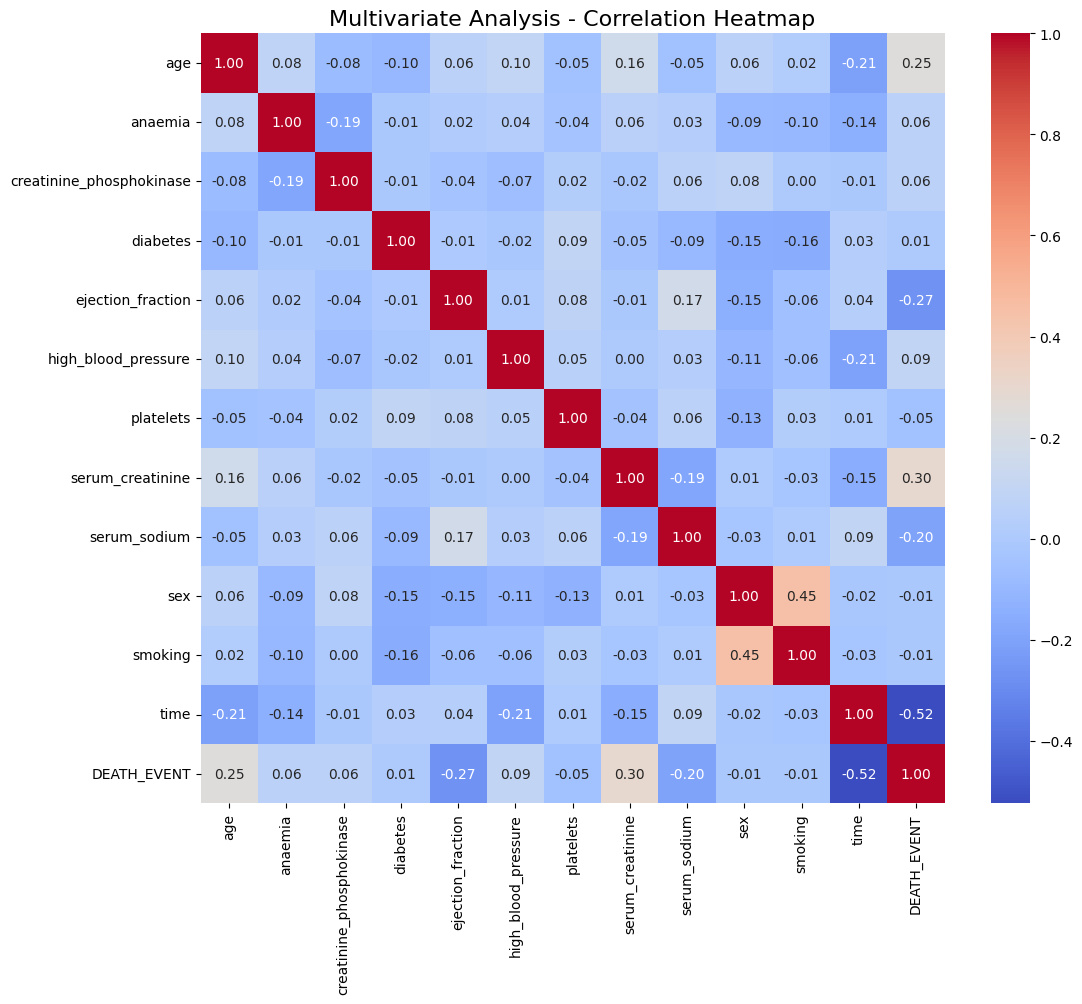

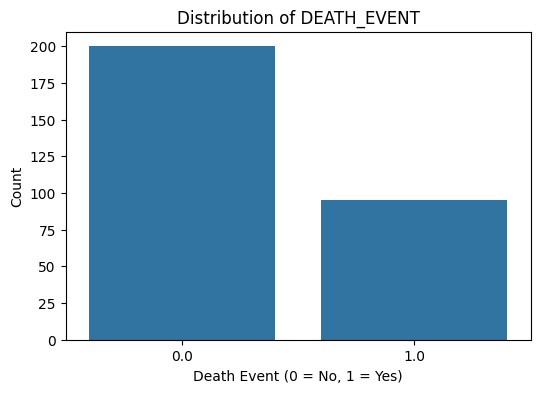

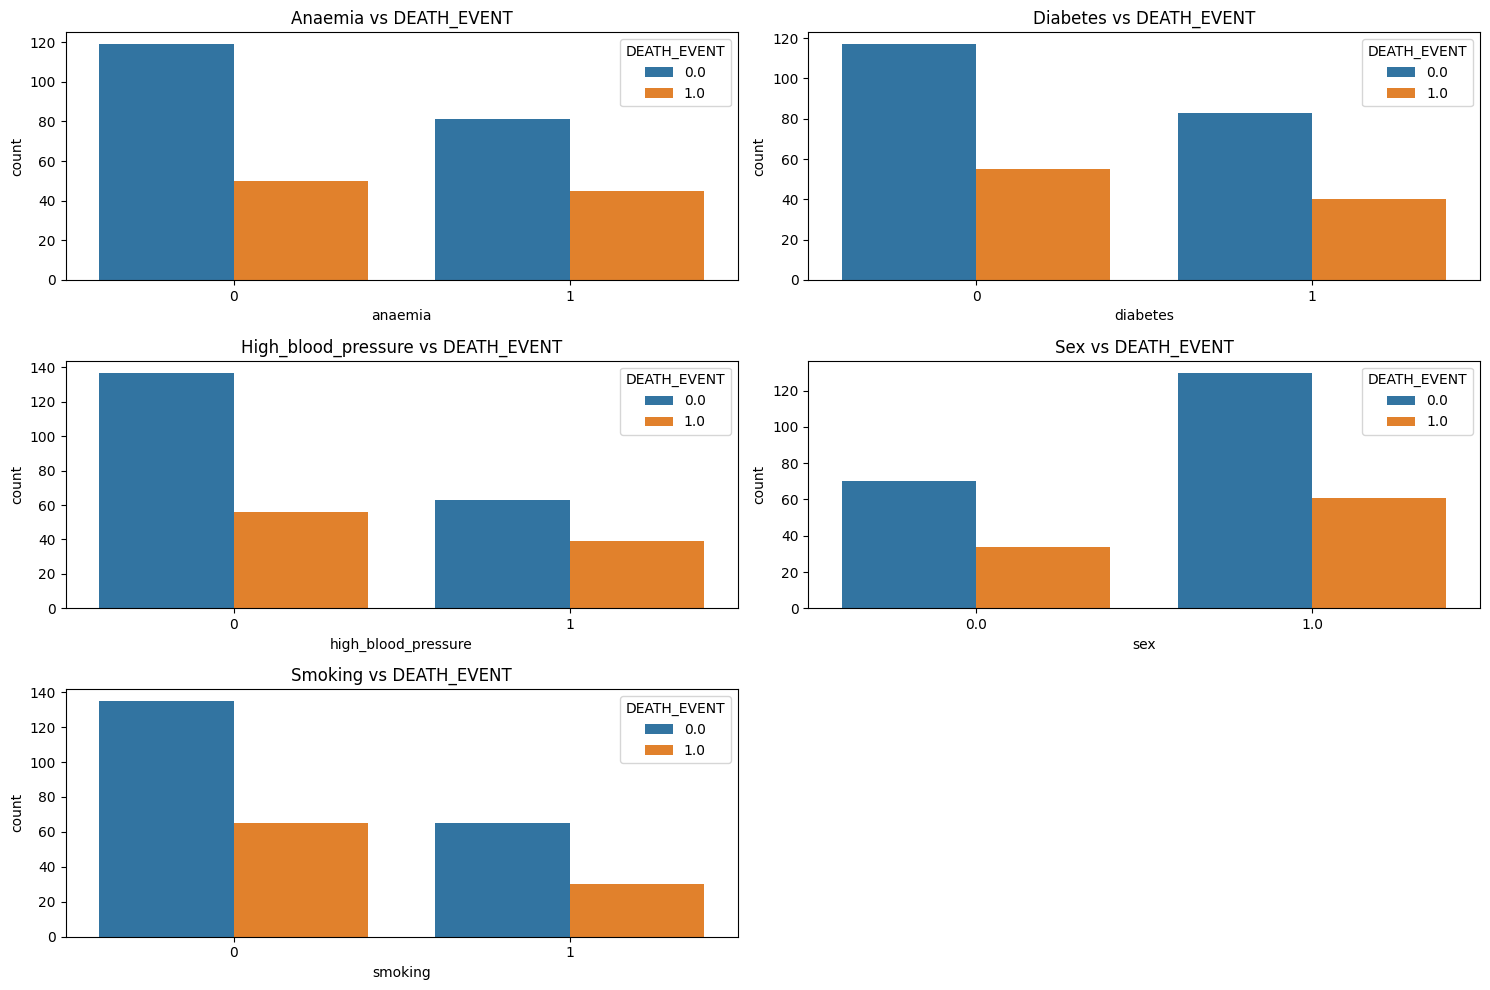


Logistic Regression Model Evaluation:
Accuracy: 0.8135593220338984
Precision: 0.6842105263157895
Recall: 0.7222222222222222
F1 Score: 0.7027027027027027
ROC AUC Score: 0.787940379403794
Confusion Matrix:
 [[35  6]
 [ 5 13]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86        41
         1.0       0.68      0.72      0.70        18

    accuracy                           0.81        59
   macro avg       0.78      0.79      0.78        59
weighted avg       0.82      0.81      0.81        59


Random Forest Model Evaluation:
Accuracy: 0.864406779661017
Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1 Score: 0.7777777777777778
ROC AUC Score: 0.8401084010840107
Confusion Matrix:
 [[37  4]
 [ 4 14]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        41
         1.0       0.78      0.78      0.78        18

    accuracy     

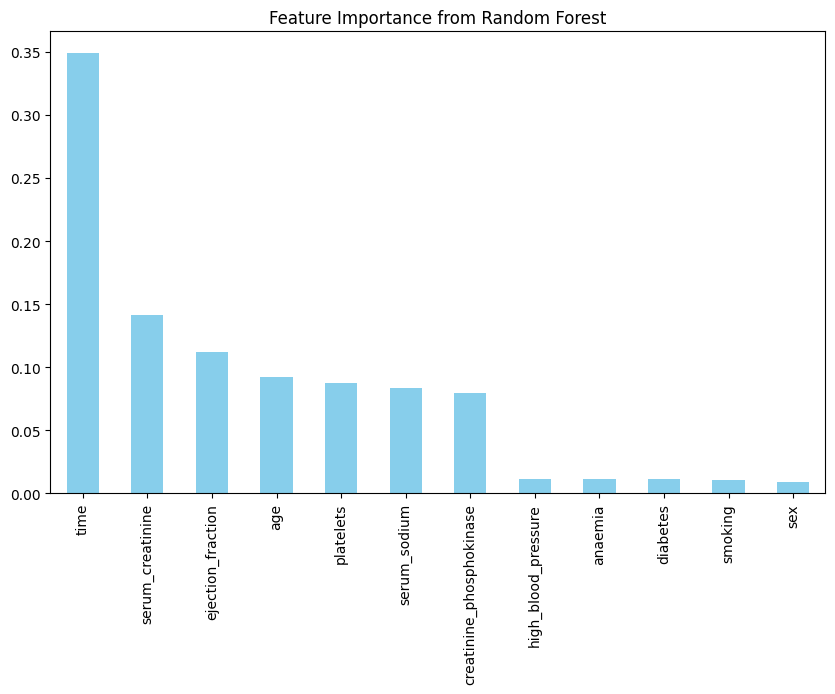

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print("Dataset Dimensions:", df.shape)
print("Dataset Columns:", df.columns)
print("\nFirst Few Rows:\n", df.head())
print("\nData Summary:\n", df.describe())
print("\nData Info:\n")
df.info()

# Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Replace any non-numeric values (like '?') with NaN
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric, setting errors='coerce' to handle non-numeric values by converting them to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Dropping any rows with NaN values after conversion
df.dropna(inplace=True)

# Rechecking for missing values after cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

# Univariate Analysis
# Plotting histograms for numerical columns to understand distributions
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(figsize=(15, 12), bins=20)
plt.suptitle("Univariate Analysis - Histograms", fontsize=16)
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Bivariate Analysis
# Checking relationship between 'DEATH_EVENT' and other numerical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='DEATH_EVENT', y=col)
    plt.title(f"{col} vs DEATH_EVENT")
plt.tight_layout()
plt.show()

# Pair plot to examine relationships between variables with the target variable
sns.pairplot(df, hue='DEATH_EVENT', diag_kind='kde', corner=True)
plt.suptitle("Bivariate Analysis - Pair Plot", y=1.02, fontsize=16)
plt.show()

# Multivariate Analysis
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Multivariate Analysis - Correlation Heatmap", fontsize=16)
plt.show()

# Checking the target distribution for 'DEATH_EVENT'
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='DEATH_EVENT')
plt.title("Distribution of DEATH_EVENT")
plt.xlabel("Death Event (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Additional Analysis: Distribution of categorical features (if applicable)
# Categorical columns can include 'anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=col, hue='DEATH_EVENT')
    plt.title(f"{col.capitalize()} vs DEATH_EVENT")
plt.tight_layout()
plt.show()

# Data Preprocessing: Splitting data into features and target variable
X = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the numerical features for the model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Evaluation - Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Model Training and Evaluation - Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation Metrics
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Model Evaluation:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Evaluate both models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Feature Importance from Random Forest
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf.feature_importances_, index=df.drop(columns='DEATH_EVENT').columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance from Random Forest")
plt.show()
